In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [2]:
# --- Load grayscale image (already grayscale)
image_path = 'cameraman_grayscale.png'  # Replace with your image filename
img = Image.open(image_path)
image = np.array(img)  # No conversion since image is already grayscale

In [3]:
# --- Define Prewitt and Sobel masks
prewitt_gx = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

prewitt_gy = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

sobel_gx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_gy = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

In [4]:
# --- Manual convolution function
def apply_filter(image, gx, gy):
    h, w = image.shape
    output = np.zeros((h-2, w-2), dtype=np.uint8)

    for i in range(1, h-1):
        for j in range(1, w-1):
            region = image[i-1:i+2, j-1:j+2]
            val_gx = np.sum(region * gx)
            val_gy = np.sum(region * gy)
            magnitude = math.sqrt(val_gx**2 + val_gy**2)
            output[i-1, j-1] = np.clip(int(magnitude), 0, 255)
    return output

In [5]:
# --- Apply Prewitt and Sobel filters
prewitt_image = apply_filter(image, prewitt_gx, prewitt_gy)
sobel_image = apply_filter(image, sobel_gx, sobel_gy)

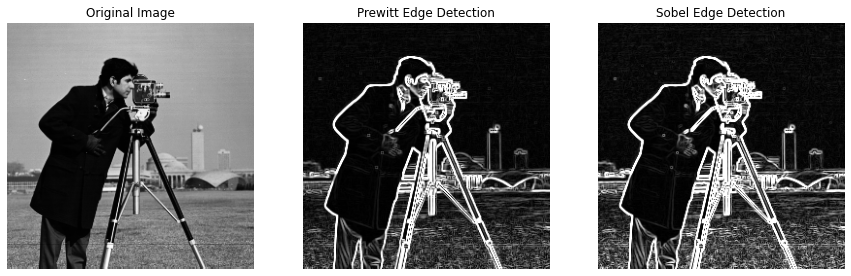

In [6]:
# --- Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.imshow(prewitt_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.imshow(sobel_image, cmap='gray')

plt.show()